# 1. Libraries

In [378]:
import pandas as pd
import numpy as np
import ast
import datetime
import time
from itertools import chain, combinations
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import plotly.express as px

# 2. Data load

In [390]:
data = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/data/data_for_clustering_1.csv')
features_precision = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/SVM_best_features_precision.csv')
features_recall = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/SVM_best_features_recall.csv')
features_f1 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/SVM_best_features_f1_1.csv')
features_fn = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/SVM_best_features_fn_1.csv')

# 3. Model define

In [391]:
def evaluate_model(feature_list):
    X = df[feature_list]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    y_pred = cross_val_predict(model, X_scaled, y, cv=skf)
    
    cm = confusion_matrix(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    return y_pred, cm, prec, rec, f1

## 3.1 Data selection based best metrics results

In [392]:
df = data.copy()
df = df.drop(columns=["fecha"])
y = df["event"].astype(int).values

In [393]:
best_features_precision = features_precision['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()
best_features_recall = features_recall['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()
best_features_f1 = features_f1['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()
best_features_fn = features_fn['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()

In [401]:
lista_features_precision = best_features_precision[2]
lista_features_recall = best_features_recall[0]
lista_features_f1 = best_features_f1[1]
lista_features_fn = best_features_fn[0]

## 3.2 Features based metrics results

### 3.2.1 SVM model based the best precision

In [395]:
K = 5
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

pred, cm, prec_val, rec_val, f1_val = evaluate_model(lista_features_precision)

print("Resultados para candidate basado en Precision:")
print(f"Precision: {prec_val:.2f}, Recall: {rec_val:.2f}, F1: {f1_val:.2f}")

Resultados para candidate basado en Precision:
Precision: 0.76, Recall: 0.73, F1: 0.75


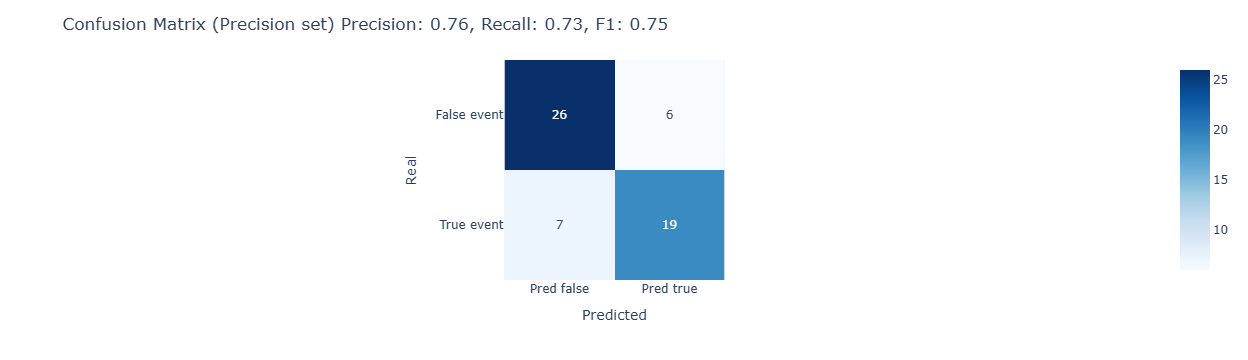

In [396]:
cm_df = pd.DataFrame(cm, index=["False event", "True event"], columns=["Pred false", "Pred true"])
title_text = (f"Confusion Matrix (Precision set)\n"
              f"Precision: {prec_val:.2f}, Recall: {rec_val:.2f}, F1: {f1_val:.2f}")

fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues")
fig.update_layout(
    title=title_text,
    xaxis_title="Predicted",
    yaxis_title="Real"
)
fig.show()

### 3.2.2 SVM model based the best recall

In [397]:
K = 5
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

pred, cm, prec_val, rec_val, f1_val = evaluate_model(lista_features_recall)

print("Resultados para candidate basado en Precision:")
print(f"Precision: {prec_val:.2f}, Recall: {rec_val:.2f}, F1: {f1_val:.2f}")

Resultados para candidate basado en Precision:
Precision: 0.72, Recall: 0.69, F1: 0.71


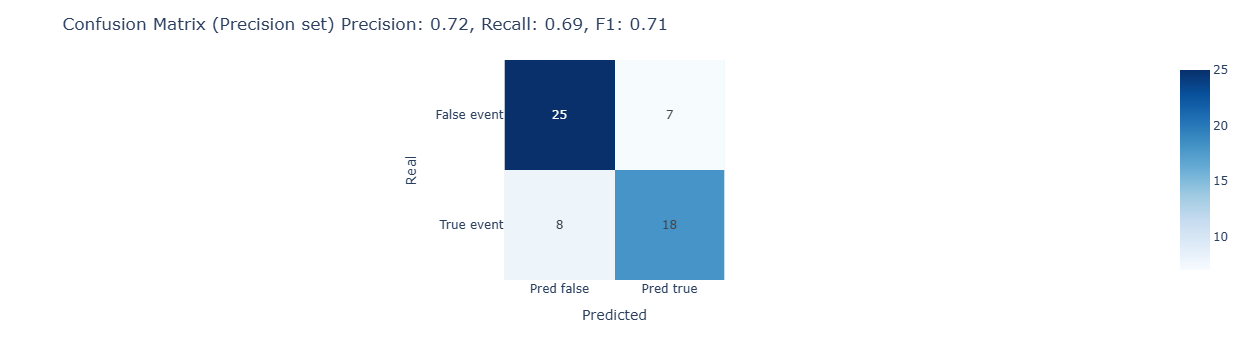

In [398]:
cm_df = pd.DataFrame(cm, index=["False event", "True event"], columns=["Pred false", "Pred true"])
title_text = (f"Confusion Matrix (Precision set)\n"
              f"Precision: {prec_val:.2f}, Recall: {rec_val:.2f}, F1: {f1_val:.2f}")

fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues")
fig.update_layout(
    title=title_text,
    xaxis_title="Predicted",
    yaxis_title="Real"
)
fig.show()

### 3.2.3 SVM model based the best F1-Score

In [405]:
K = 5
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

pred, cm, prec_val, rec_val, f1_val = evaluate_model(lista_features_f1)

print("Resultados para candidate basado en Precision:")
print(f"Precision: {prec_val:.4f}, Recall: {rec_val:.4f}, F1: {f1_val:.4f}")

Resultados para candidate basado en Precision:
Precision: 0.8400, Recall: 0.8077, F1: 0.8235


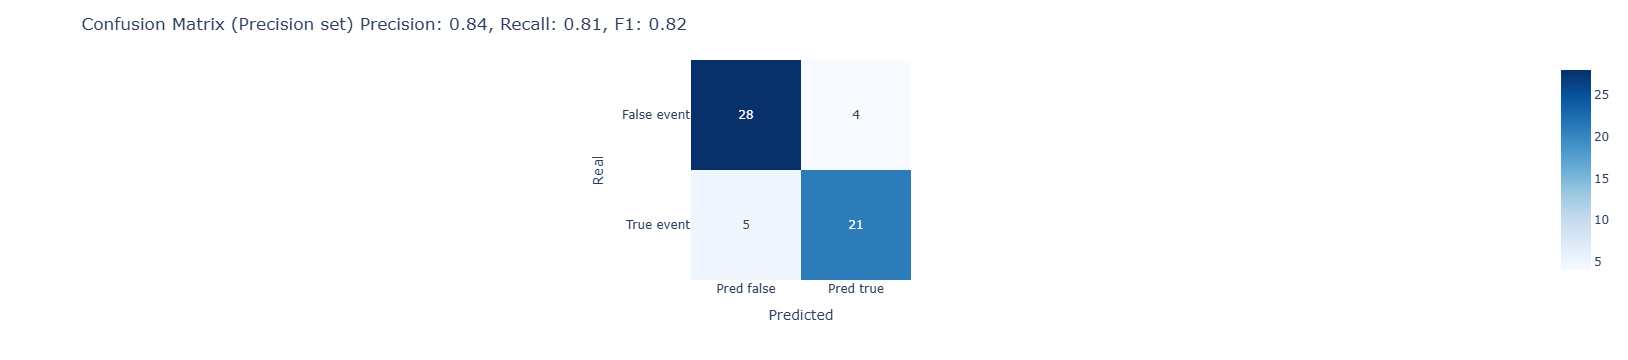

In [406]:
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues")

cm_df = pd.DataFrame(cm, index=["False event", "True event"], columns=["Pred false", "Pred true"])
title_text = (f"Confusion Matrix (Precision set)\n"
              f"Precision: {prec_val:.2f}, Recall: {rec_val:.2f}, F1: {f1_val:.2f}")

fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues")
fig.update_layout(
    title=title_text,
    xaxis_title="Predicted",
    yaxis_title="Real"
)
fig.show()


### 3.2.4 SVM model based the best FN

In [358]:
K = 5
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

pred, cm, prec_val, rec_val, f1_val = evaluate_model(lista_features_fn)

print("Resultados para candidate basado en Precision:")
print(f"Precision: {prec_val:.2f}, Recall: {rec_val:.2f}, F1: {f1_val:.2f}")

Resultados para candidate basado en Precision:
Precision: 0.94, Recall: 0.62, F1: 0.74


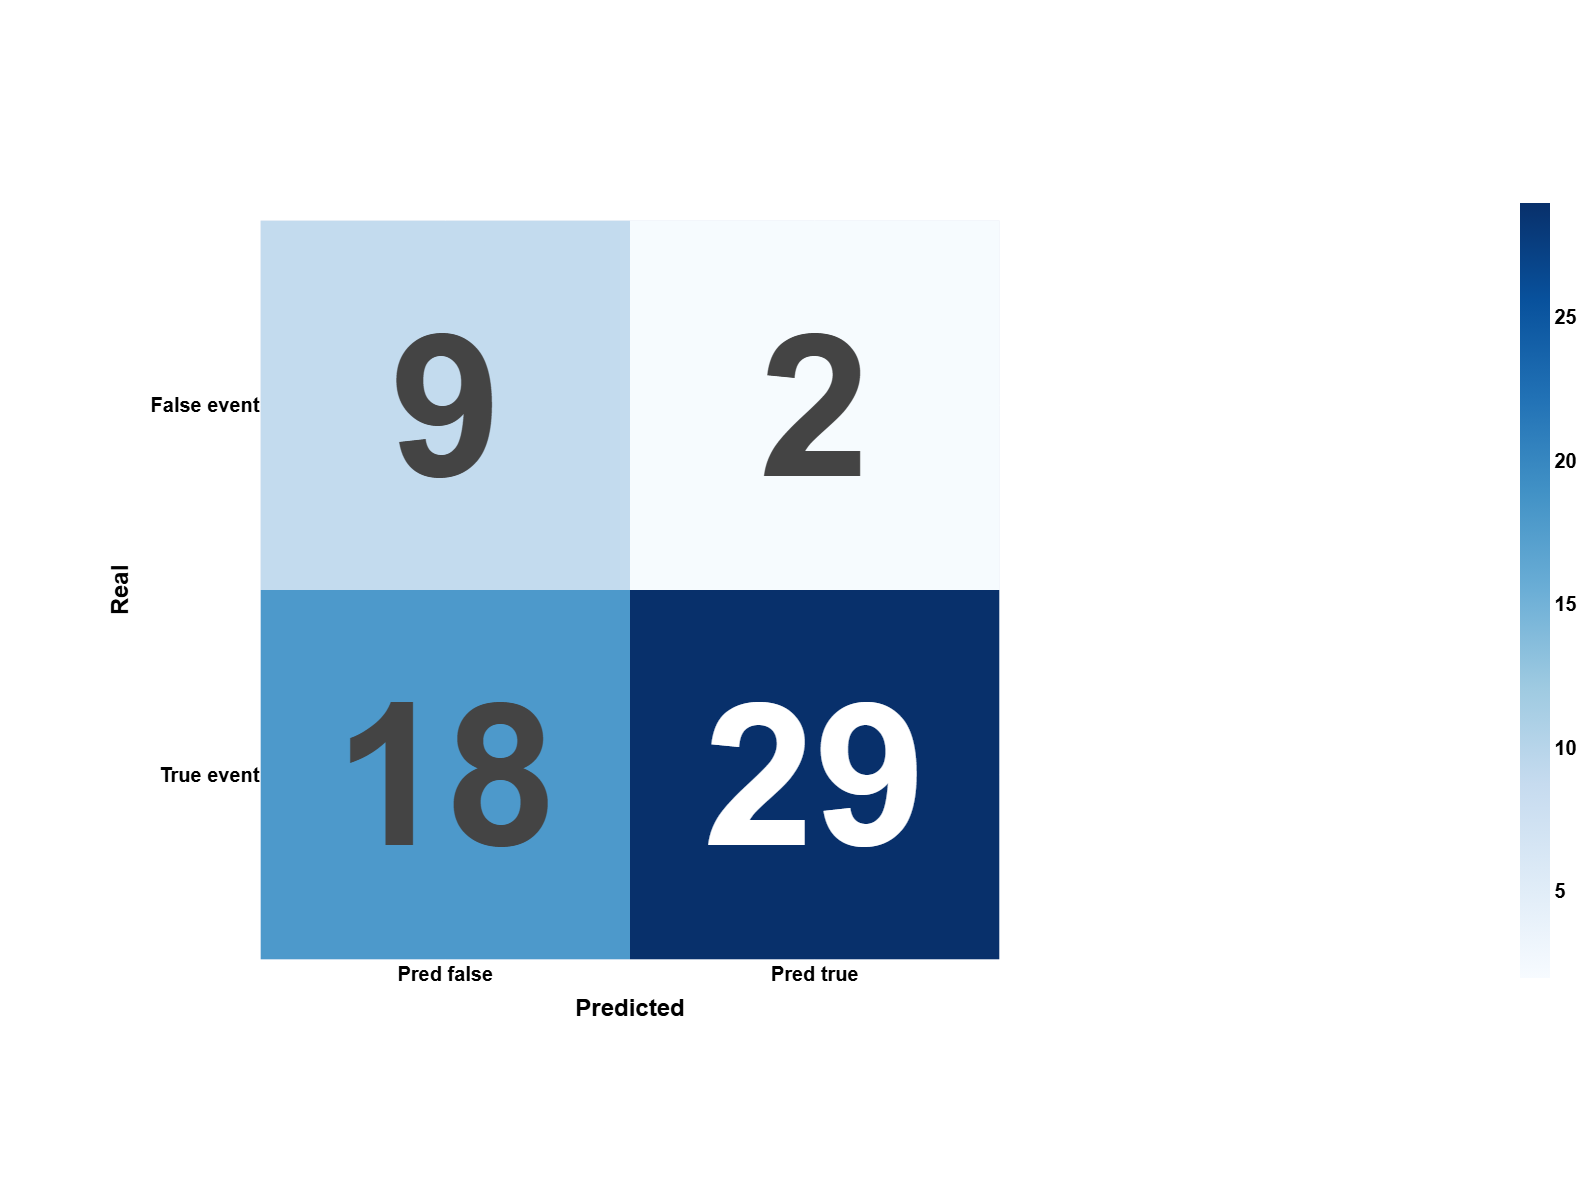

In [359]:
cm_df = pd.DataFrame(cm, index=["False event", "True event"], columns=["Pred false", "Pred true"])

fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues")

# Actualizar el layout para quitar el título, poner el texto en color negro y mover la escala a la izquierda
fig.update_layout(
    xaxis_title="Predicted",
    yaxis_title="Real",
    #title_text="",  # Quitar el título
    font=dict(
        family="Arial",  # Fuente en negrita
        size=20,               # Tamaño del texto
        color="black",
        weight="bold"# Color negro
    ),
    coloraxis_colorbar=dict(
        title_font=dict(size=13, color="black"),  # Título en color negro y tamaño 13
        len=0.75,                                   # Ajusta el tamaño de la escala de color
        x=1.3,                                   # Mueve la barra de color hacia la izquierda
        y=0.5                                    # Mantiene la barra centrada verticalmente
    ),
    margin=dict(r=40),          # Reduce el margen derecho para dar espacio a la barra de color
    width=1200,                 # Establece el ancho de la imagen a 1200 píxeles
    height=1200                 # Establece la altura de la imagen a 1200 píxeles
)
fig.update_traces(textfont=dict(size=200, weight="bold"))
fig.show()
